# PREDICTING CUSTOMER RESPONSE TO TELEMARKETING CAMPAIGNS

## TABLE OF CONTENTS
1. Project Background
2. data Cleaning
3. Exploratory data analysis
4. data visualization
5. machine learning : Classification
6. machine learning : Reggresion
7. conslusion & recommendation

# Part 1. Project Background

Saat ini, pengeluaran pemasaran dalam industri perbankan sangat besar, yang berarti bahwa sangat penting bagi bank-bank untuk mengoptimalkan strategi pemasaran dan meningkatkan efektivitasnya. Memahami kebutuhan pelanggan mengarah pada perencanaan pemasaran yang lebih efektif, desain produk yang lebih cerdas, dan kepuasan pelanggan yang lebih besar.

**Tujuan Utama: Meningkatkan efektivitas kampanye telemarketing bank**

Proyek ini akan memungkinkan bank untuk mengembangkan pemahaman yang lebih terperinci tentang basis pelanggannya, memprediksi respons pelanggan terhadap kampanye telemarketingnya, dan membentuk profil pelanggan target untuk rencana pemasaran masa depan.

Dengan menganalisis fitur-fitur pelanggan, seperti data demografis dan riwayat transaksi, bank akan dapat memprediksi perilaku menabung pelanggan dan mengidentifikasi jenis pelanggan yang lebih cenderung melakukan deposito berjangka. Bank kemudian dapat memusatkan upaya pemasarannya pada pelanggan-pelanggan tersebut. Hal ini tidak hanya akan memungkinkan bank untuk mengamankan deposito dengan lebih efektif, tetapi juga meningkatkan kepuasan pelanggan dengan mengurangi iklan yang tidak diinginkan bagi sebagian pelanggan.

# PART 2. DATA CLEANING

![Teks Alternatif](./data/bersihkan_data.png)


# load Data Raw Data

dataset ini adalah nomor telepon yang di dapatkan langsung dari marketing campaigns, yang dimana tujuan untuk mempromosikan deposito berjangka diantara pelanggan yg sudah ada. oleh sebuah lembaga perbankan di portugal dari bulan mei 2008 sampai november 2010. Dataset ini tersedia secara publik di UCI Machine Learning Repository, dan dapat diunduh dari http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.

In [1]:
# import package

import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
dataset1 = pd.read_csv('./data/bank-full.csv/bank-full.csv', sep=';')

In [3]:
dataset1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Penjelasan dari masing-masing kolom:
1. age : Umur 
2. job : jenis pekerjaan
3. education : pendidikan terakhir
4. default : pelanggan atau calon pelanggan tidak memenuhi kewajiban atau komitmen yang telah dibuat dalam sebuah  kesepakatan atau perjanjian, seperti pembayaran atau langganan(tidak memenuhi pembayaran atau kewajiban finansial mereka sesuai dengan yang telah disepakati)

5. balance : saldo atau sisa dana yang dimiliki oleh pelanggan di akun atau rekening mereka.
6. housing : memiliki rumah atau tidak
7. loan :  memiliki pinjaman atau tidak
8. contact : jenis barang yang digunakan (hp, telepon rumah)
9. day : tanggal user ditelpon
10. month : bulan user di telpon
11. duration : berapa lama pembicaraan dilakukan oleh telemarketing dengan user(detik)
12. campaign : sudah berapa kali perusahaan menelpon klien untuk menyampaikan ada kampanye apa saja
13. pdays : jumlah hari sejak kontak terakhir dengan pelanggan.
14. previous : seberapa sering bank atau perusahaan telah mencoba menghubungi pelanggan sebelum kampanye saat ini.
15. poutcome : "poutcome" akan memiliki nilai-nilai seperti "sukses" (jika pelanggan setuju atau mendaftar), "gagal" (jika pelanggan menolak atau tidak tertarik),
16. y : hasil akhirnya

In [4]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Dataset ini terdiri dari 45.211 observasi. Setiap observasi mewakili seorang pelanggan yang sudah ada yang dihubungi oleh bank melalui panggilan telepon.

 - Untuk setiap observasi, dataset mencatat 16 variabel input yang mencakup atribut kualitatif dan kuantitatif dari pelanggan, seperti usia, pekerjaan, status hunian dan pinjaman pribadi, saldo akun, dan jumlah kontak.

- Terdapat satu variabel output biner tunggal yang menunjukkan "ya" atau "tidak" yang mengungkapkan hasil dari panggilan telepon tersebut.

# clean the dataset

## 2.1 deal with missing data

Tidak ada nilai yang hilang dalam dataset ini. Namun, terdapat nilai-nilai seperti "unknown" (tidak diketahui) atau "others" (lainnya), yang serupa dengan nilai-nilai yang hilang karena mereka tidak memberikan informasi yang jelas. Oleh karena itu, nilai-nilai ambigu ini dihapus dari dataset.

In [5]:
# Step 1: Delete the rows which column 'poutcome' contains 'other'
dataset1 = dataset1.drop(dataset1[dataset1['poutcome'] == 'other'].index, axis=0)

In [6]:
# Step 2: replace 'unknown' in job and education with 'other'
dataset1[['job', 'education']] = dataset1[['job', 'education']].replace(['unknown'],'other')

## 2.2 drop outlier in the columns 'balance'

Untuk menangkap tren umum dalam dataset, nilai-nilai yang dianggap sebagai outliers dalam kolom "balance" dihapus. Outliers didefinisikan sebagai nilai-nilai yang lebih dari tiga deviasi standar dari rata-rata. Secara ringkas, sebanyak 2.556 baris data dihapus.

In [7]:
from scipy.stats import zscore

dataset1['balance'].max()
dataset1['balance'].min()

dataset1['balance_outliers'] = dataset1['balance']
dataset1['balance_outliers'] = zscore(dataset1['balance_outliers'])

dataset3 = dataset1.drop(dataset1[(dataset1['balance_outliers'] > 3) | (dataset1['balance_outliers'] < -3)].index, axis=0)

In [8]:
dataset3.drop('balance_outliers', axis=1, inplace=True)

## 2.3 Creating and transforming data

Beberapa perubahan telah dilakukan pada nama kolom, satuan, dan tipe data untuk memudahkan analisis.

In [9]:
# step 1 : change column name : 'y' to 'response'
dataset3.rename(index=str, columns={'y':'response'}, inplace=True)

def convert(dataset, new_column, old_column):
    dataset[new_column] = dataset[old_column].apply(lambda x : 0 if x == 'no' else 1)
    return dataset[new_column].value_counts()
    
convert(dataset3,'response_binary','response')

0    37785
1     4870
Name: response_binary, dtype: int64

In [10]:
# step 2 drop column 'contact' which useless
dataset3.drop('contact', axis=1,inplace=True)

In [11]:
# steo 3 : change column duration from seconds to minutes
dataset3['duration'] = dataset3['duration'].apply(lambda x : x/60).round(2)
dataset3

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,47,blue-collar,married,other,no,1506,yes,no,5,may,1.53,1,-1,0,unknown,no,0
4,33,other,single,other,no,1,no,no,5,may,3.30,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


In [12]:
# step 4 change month from words to number for easier analysis
lst = [dataset3]

for column in lst:
    column.loc[column['month'] == 'jan', 'month_int'] = 1
    column.loc[column['month'] == 'feb', 'month_int'] = 2
    column.loc[column['month'] == 'mar', 'month_int'] = 3
    column.loc[column['month'] == 'apr', 'month_int'] = 4
    column.loc[column['month'] == 'may', 'month_int'] = 5
    column.loc[column['month'] == 'jun', 'month_int'] = 6
    column.loc[column['month'] == 'jul', 'month_int'] = 7
    column.loc[column['month'] == 'aug', 'month_int'] = 8
    column.loc[column['month'] == 'sep', 'month_int'] = 9
    column.loc[column['month'] == 'oct', 'month_int'] = 10
    column.loc[column['month'] == 'nov', 'month_int'] = 11
    column.loc[column['month'] == 'dec', 'month_int'] = 12

In [13]:
dataset3['month_int'] = dataset3['month_int'].astype(int)

## 2.4 Filtering

In [14]:
# step 1 drop 'duration' < 5s
condition2 = dataset3['duration'] < 5/60
dataset3 = dataset3.drop(dataset3[condition2].index, axis=0)

In [15]:
# step 2 drop customer values with 'other' education
condition3 = dataset3['education'] == 'other'
dataset7 = dataset3.drop(dataset3[condition3].index, axis=0)

# Part 3. Exploratory Data Analysis

Untuk memahami dataset lebih baik, distribusi variabel kunci dan hubungan di antara mereka dapat diplot. Berikut adalah panduan umum dalam Bahasa Indonesia untuk memulai.

## 3.1 Visualize distribution of 'age' and 'balance'

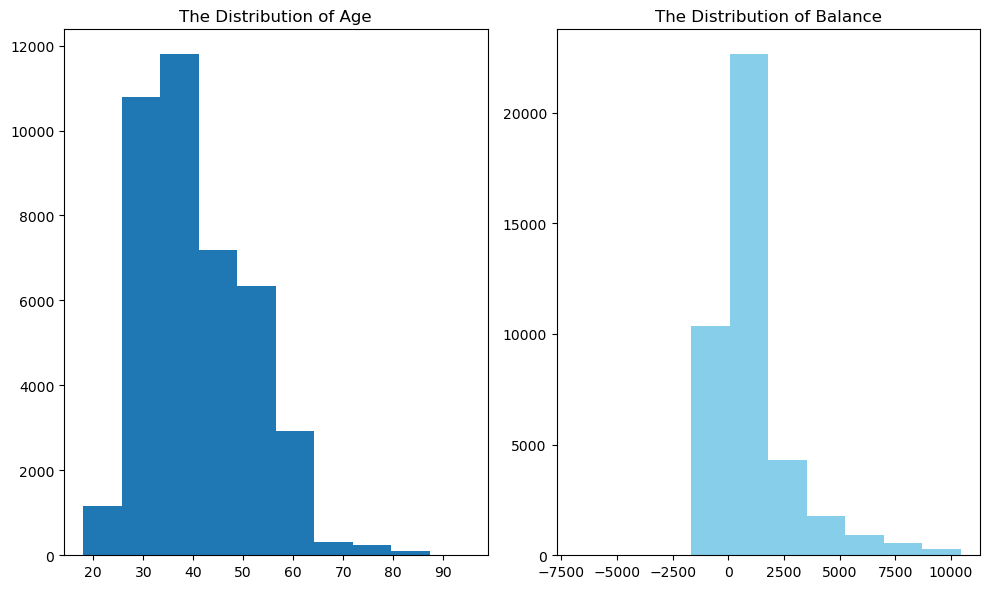

In [16]:
dist_age_balance = plt.figure(figsize=(10,6))

ra1 = dist_age_balance.add_subplot(1,2,1)
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(dataset7['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(dataset7['balance'], color='skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout()
plt.show()

**Distribusi Usia**: Dalam kampanye telemarketingnya, klien yang dihubungi oleh bank memiliki rentang usia yang luas, mulai dari 18 hingga 95 tahun. Namun, sebagian besar pelanggan yang dihubungi berada dalam kelompok usia 30-an dan 40-an (usia antara 33 hingga 48 tahun masuk dalam persentil 25 hingga 75). Distribusi usia pelanggan cenderung normal dengan deviasi standar yang kecil.

**Distribusi Saldo**: Setelah menghapus outlier dalam saldo, rentang saldo masih sangat besar, mulai dari minimum -6847 hingga maksimum 10443 euro, memberikan rentang sebesar 17290 euro. Distribusi saldo memiliki deviasi standar yang besar relative terhadap rata-rata, menunjukkan variasi besar dalam tingkat saldo pelanggan.

Dalam distribusi saldo, perhatikan bahwa terdapat nilai negatif, yang mungkin mengindikasikan utang atau saldo yang rendah. Ini menggambarkan variasi dalam situasi finansial pelanggan.

In [17]:
## 3.2 Visualize the relationship between 'age' and 'balance'

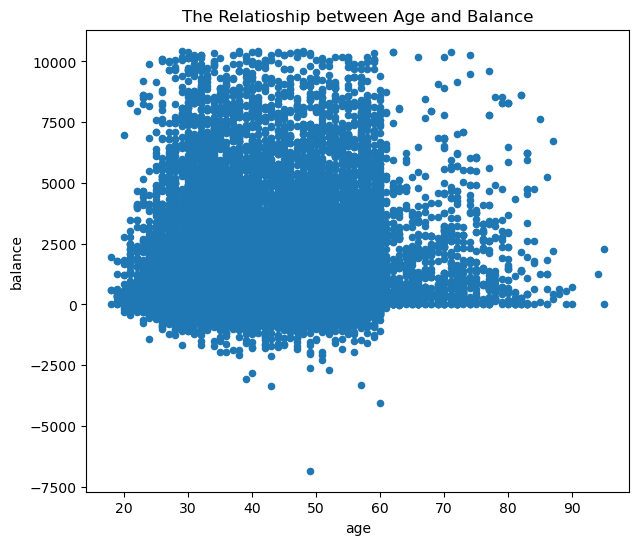

In [18]:
age_and_balance = dataset7.plot.scatter('age','balance', figsize=(7,6))

plt.title('The Relatioship between Age and Balance')
plt.show()

dari hasil scatter plot, tidak terlihat hubungan kedua antara kolom 'age' dan 'balance'. meskipun begitu, umur yang diatas 60, klien memiliki pendapatan yang signifikan rendah, kebanyakan dibawah 5.0000 euro. disini dapat diambil kesimpulan bahwa kebanyakan orang yang pensiun 60 tahun dan tidak punya sumber pendapatan diatas.

## 3.3 Visualize distribution of duration and campaign

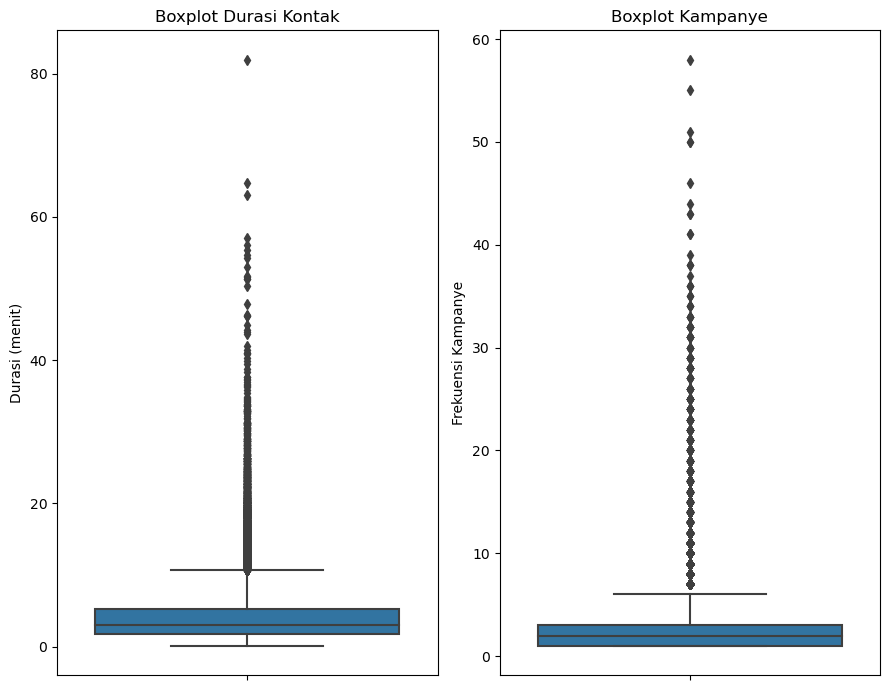

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(9, 7))  # 1 row, 2 columns

# Create a boxplot for 'duration' in the first subplot
sns.boxplot(data=dataset7, y='duration', ax=axes[0])
axes[0].set_title('Boxplot Durasi Kontak')
axes[0].set_ylabel('Durasi (menit)')

# Create a boxplot for 'campaign' in the second subplot
sns.boxplot(data=dataset7, y='campaign', ax=axes[1])
axes[1].set_title('Boxplot Kampanye')
axes[1].set_ylabel('Frekuensi Kampanye')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

**Distribusi Durasi**: Seperti yang diamati dari diagram kotak (box plot), durasi kontak memiliki median sekitar 3 menit, dengan rentang interkuartil (IQR) sekitar 1,73 menit hingga 5,3 menit. Diagram kotak yang condong ke kiri menunjukkan bahwa sebagian besar panggilan relatif singkat. Selain itu, terdapat sejumlah besar pencilan (outliers) dengan durasi panggilan berkisar antara 10 menit hingga 40 menit, yang perlu diteliti lebih lanjut.

**Distribusi Kampanye**: Sekitar setengah dari klien telah dihubungi oleh bank untuk kedua kalinya, sementara 25% sisanya adalah pengenalan pertama terhadap deposito berjangka. Sebagian besar klien telah dihubungi oleh bank sebanyak satu hingga tiga kali, yang masuk akal. Namun, beberapa klien telah dihubungi sebanyak 58 kali, yang tidak wajar. Klien-klien ini mungkin memiliki kebutuhan khusus yang memerlukan kontak yang lebih sering.

## 3.4 Visualize the relationship between 'duration' & 'campaign' with response result

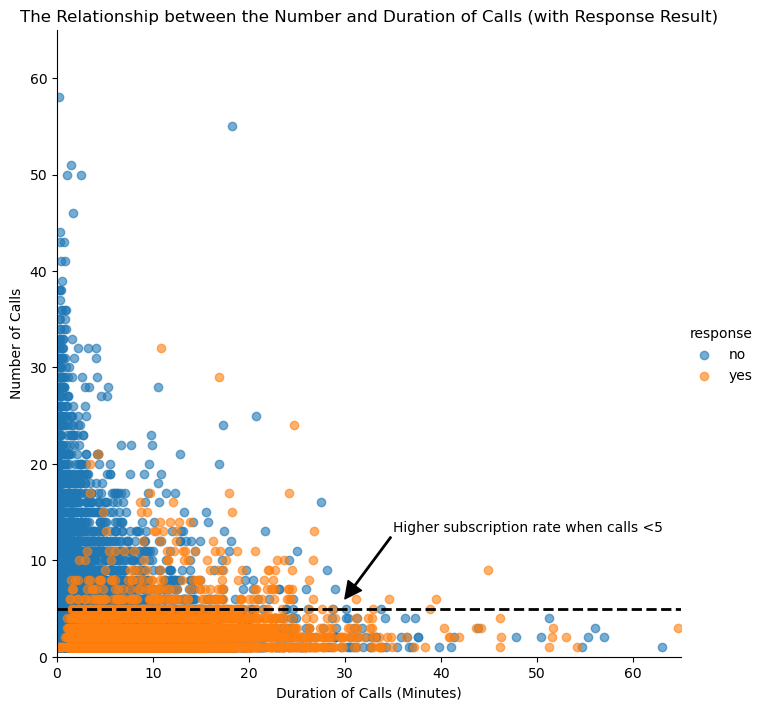

In [20]:
dur_camp = sns.lmplot(x='duration',y='campaign', data=dataset7, hue='response', fit_reg=False, scatter_kws={'alpha':0.6}, height=7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

plt.axhline(y=5, linewidth=2, color='k', linestyle='--')
plt.annotate('Higher subscription rate when calls <5', xytext=(35,13), xy=(30,6), arrowprops=dict(color ='k', width=1))

plt.show()

Dalam scatter plot ini, klien yang berlangganan deposito berjangka ditandai sebagai "ya" sementara yang tidak berlangganan ditandai sebagai "tidak".

Seperti yang terlihat dari plot, klien "ya" dan klien "tidak" membentuk dua kelompok yang relatif terpisah. Dibandingkan dengan klien "tidak", klien "ya" dihubungi lebih sedikit kali dan memiliki durasi panggilan yang lebih lama. Yang lebih penting, setelah lima panggilan kampanye, klien lebih cenderung menolak deposito berjangka kecuali jika durasinya cukup lama. Sebagian besar klien "ya" dihubungi kurang dari 10 kali.

Hal ini menunjukkan bahwa bank sebaiknya tidak menghubungi seorang klien lebih dari lima kali, karena hal ini dapat mengganggu dan meningkatkan ketidakpuasan klien.

## 3.5 scatter matrix and correlation matrix


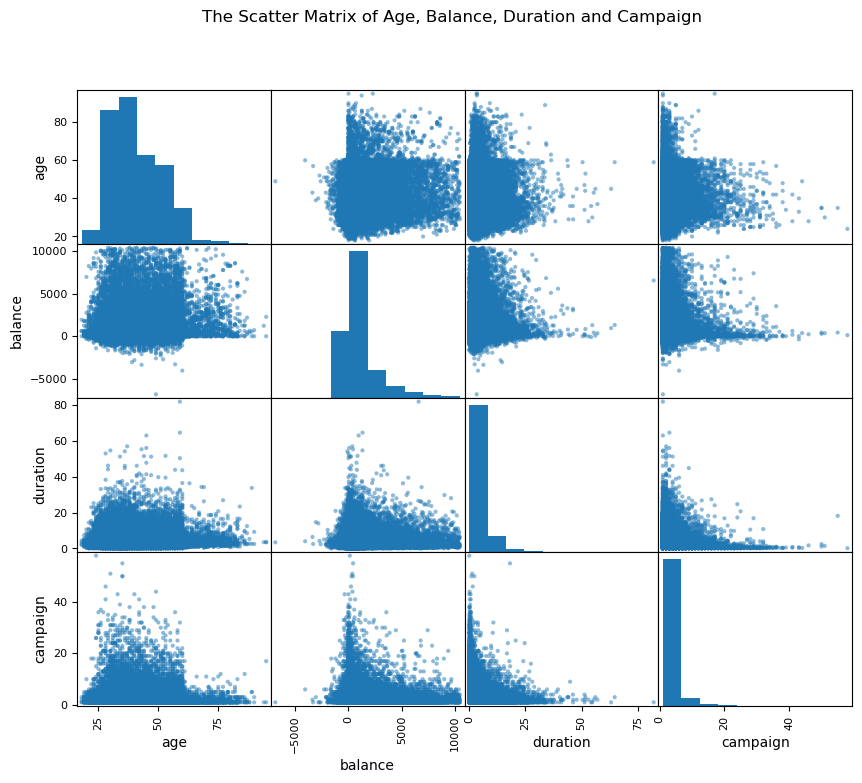

In [21]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(dataset7[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

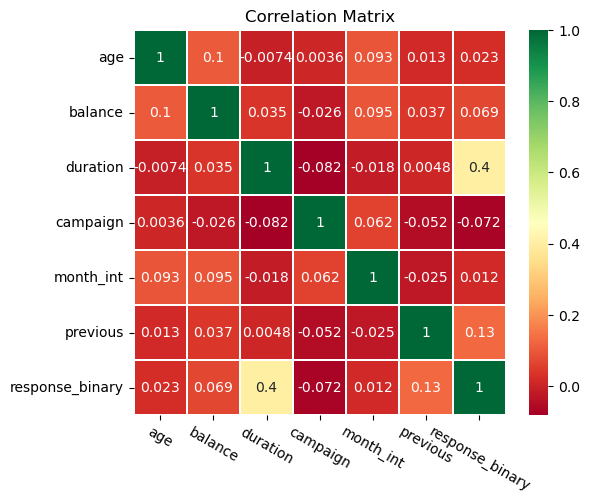

In [22]:
corr_data = dataset7[['age','balance','duration','campaign','month_int','previous','response_binary']]

corr = corr_data.corr()

cor_plot = sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidth=0.2, annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Matriks sebaran (scatter matrix) tidak menunjukkan hubungan yang jelas antara usia (age), saldo (balance), durasi (duration), dan jumlah kampanye (campaign).

Untuk menyelidiki lebih lanjut tentang korelasi, sebuah matriks korelasi dibuat dengan semua variabel kualitatif. Dalam matriks korelasi ini, terlihat dengan jelas bahwa "hasil kampanye" (campaign outcome) memiliki korelasi kuat dengan "durasi" (duration), korelasi sedang dengan "kontak sebelumnya" (previous contacts), dan korelasi yang lebih lemah antara "saldo" (balance), "bulan kontak" (month of contact), dan "jumlah kampanye" (number of campaign). Pengaruh-pengaruh variabel ini terhadap hasil kampanye akan diselidiki lebih lanjut dalam bagian pemelajaran mesin (machine learning).

# Part 4. Data visualization

## 4.1 Visualize the subsciption and contract rate by age

In [23]:
lst = [dataset7]
for column in lst:
    column.loc[column['age'] < 30, 'age_group'] = 20
    column.loc[(column['age'] >=30 ) & (column['age'] <=39), 'age_group'] = 30
    column.loc[(column['age'] >=40 ) & (column['age'] <=49), 'age_group'] = 40
    column.loc[(column['age'] >=50 ) & (column['age'] <=59), 'age_group'] = 50
    column.loc[column['age'] >=60, 'age_group'] = 60

In [24]:
dataset7['age_group'] = dataset7['age_group'].astype(int)

In [25]:
count_age_response_pct = pd.crosstab(dataset7['response'], dataset7['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()
count_age_response_pct

response,no,yes
age_group,,
20,83.013699,16.986301
30,89.635398,10.364602
40,91.175912,8.824088
50,90.817141,9.182859
60,66.599462,33.400538


In [26]:
age = pd.DataFrame(dataset7['age_group'].value_counts())

age['% contacted'] = age['age_group'] * 100 / age['age_group'].sum()
age['% subscription'] = count_age_response_pct['yes']
age.drop('age_group', axis=1, inplace=True)

age['age'] = [30, 40, 50, 20, 60]
age = age.sort_values(by='age', ascending=True)
age

,% contacted,% subscription,age
20,11.618227,16.986301,20
30,40.562180,10.364602,30
40,25.778017,8.824088,40
50,18.398178,9.182859,50
60,3.643398,33.400538,60


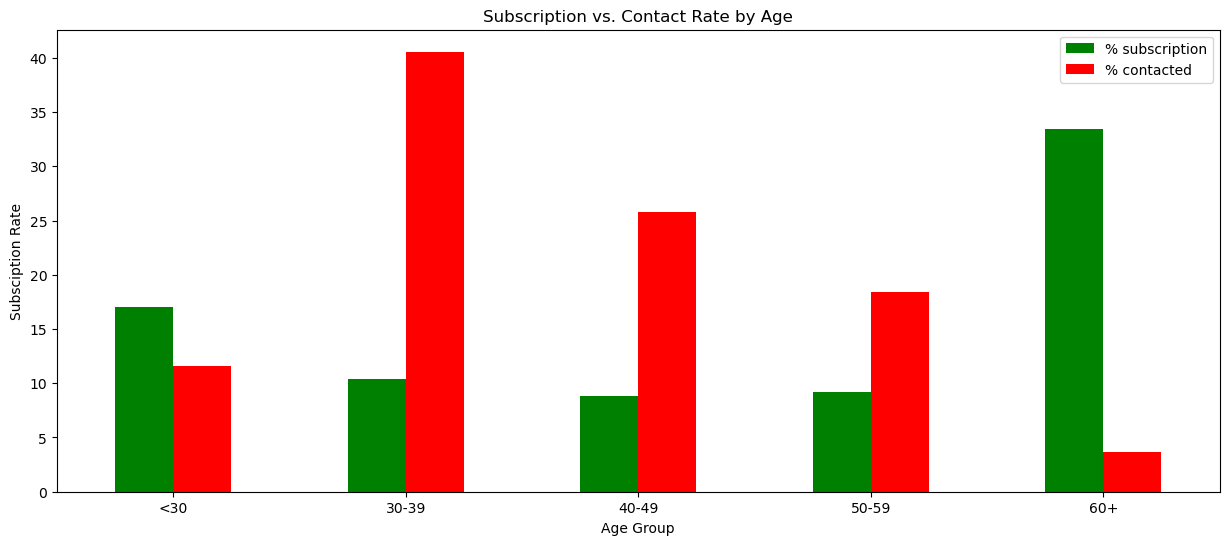

In [27]:
plot_age = age[['% subscription', '% contacted']].plot(kind='bar', figsize=(15,6), color=('green','red'))

plt.xlabel('Age Group')
plt.ylabel('Subsciption Rate')
plt.xticks(np.arange(5), ('<30','30-39','40-49','50-59','60+'), rotation='horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

**Targetkan yang Termuda dan yang Tertua daripada yang Berusia Paruh Baya**

- **Alasan Pilihan ini Tidak Mengejutkan:** Ini menunjukkan bahwa bank sebaiknya mempertimbangkan untuk fokus pada klien yang berusia muda (18-29 tahun) dan yang paling tua (60+ tahun) daripada yang berusia paruh baya. Hal ini disebabkan oleh fakta bahwa klien yang berusia 60+ memiliki tingkat berlangganan deposito tertinggi. Sekitar 17% dari total berlangganan berasal dari klien berusia 18 hingga 29 tahun. Lebih dari 50% dari semua berlangganan datang dari kelompok yang paling muda dan yang paling tua.

- **Fokus Kampanye Pemasaran pada Kelompok Usia yang Lebih Muda dan yang Lebih Tua:** Pesan ini juga mencatat bahwa bank telah memfokuskan upaya pemasarannya pada kelompok usia paruh baya yang menghasilkan tingkat berlangganan yang lebih rendah daripada kelompok yang lebih muda dan yang lebih tua. Oleh karena itu, untuk membuat kampanye pemasaran lebih efektif, bank sebaiknya mempertimbangkan untuk mengarahkan kampanye pemasaran mereka pada klien yang lebih muda dan yang lebih tua di masa depan.

Dalam ringkasannya, pesan tersebut menyarankan bahwa bank seharusnya lebih memahami preferensi dan kebutuhan berinvestasi dari berbagai kelompok usia klien mereka dan menyesuaikan strategi pemasaran mereka untuk mencapai kesuksesan yang lebih baik dalam mendapatkan berlangganan deposito berjangka.

## 4.2 Visualize the subcription rate by balance level

In [28]:
lst = [dataset7]

for column in lst:
    column.loc[column['balance'] <= 0, 'balance_group'] = 'no balance'
    column.loc[(column['balance'] > 0) & (column['balance'] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column['balance'] > 1000) & (column['balance'] <= 5000), 'balance_group'] = 'average balance'
    column.loc[column['balance'] > 5000, 'balance_group'] = 'high balance'

In [29]:
count_balance_response_pct = pd.crosstab(dataset7['response'], dataset7['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()
count_balance_response_pct

response,no,yes
balance_group,,
average balance,85.237209,14.762791
high balance,85.080856,14.919144
low balance,89.265352,10.734648
no balance,93.078512,6.921488


In [30]:
bal = pd.DataFrame(dataset7['balance_group'].value_counts())


bal['% contacted'] = bal['balance_group'] * 100 / bal['balance_group'].sum()
bal['% subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace=True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal', ascending = True)
bal

,% contacted,% subscription,bal
no balance,16.591171,6.921488,0
low balance,52.393428,10.734648,1
average balance,26.321589,14.762791,2
high balance,4.693813,14.919144,3


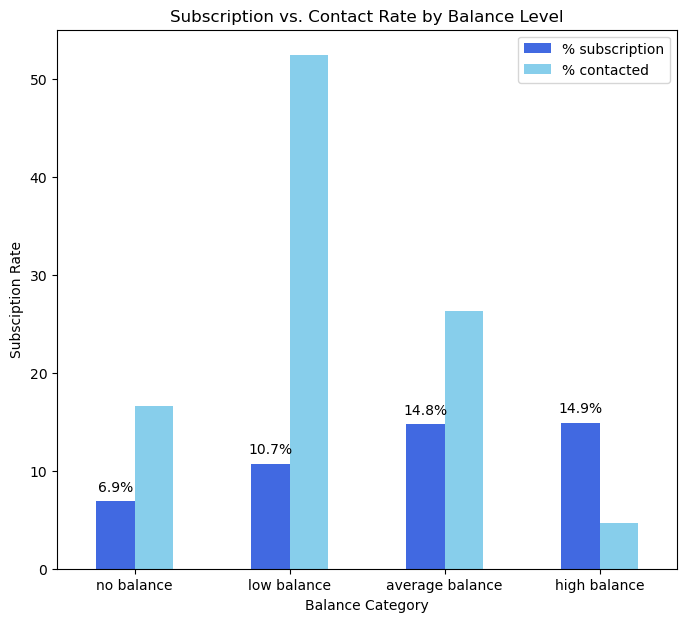

In [31]:
plot_balance = bal[['% subscription','% contacted']].plot(kind='bar', figsize=(8,7), color=('royalblue', 'skyblue'))
                

plt.xlabel('Balance Category')
plt.ylabel('Subsciption Rate')
plt.xticks(rotation='horizontal')
plt.title('Subscription vs. Contact Rate by Balance Level')
                                                          
# label the bar
for rec, label in zip(plot_balance.patches, bal['% subscription'].round(1).astype(str)):
        plot_balance.text(rec.get_x() + rec.get_width()/2, 
        rec.get_height() + 1, 
        label+'%',  
        ha = 'center', 
        color = 'black')

**Targetkan Klien dengan Saldo Rata-rata atau Tinggi**

Pesan ini menyarankan bank untuk memfokuskan upaya pemasarannya pada klien dengan saldo rata-rata atau tinggi. Salah satu alasan adalah karena terdapat hubungan positif antara tingkat saldo klien dan tingkat berlangganan deposito. Klien yang memiliki saldo negatif hanya memiliki tingkat berlangganan sebesar 6,9%, sementara klien dengan saldo rata-rata atau tinggi memiliki tingkat berlangganan yang jauh lebih tinggi, hampir mencapai 15%.

**Kategorisasi Klien Berdasarkan Saldo** 

Klien-klien dikategorikan ke dalam empat kelompok berdasarkan tingkat saldo mereka:

- No Balance (Tidak Ada Saldo): Klien yang memiliki saldo negatif.
- Low Balance (Saldo Rendah): Klien yang memiliki saldo antara 0 dan 1000 euro.
- Average Balance (Saldo Rata-rata): Klien yang memiliki saldo antara 1000 dan 5000 euro.
- High Balance (Saldo Tinggi): Klien yang memiliki saldo lebih dari 5000 euro.

**Perubahan Fokus Pemasaran** 

Pesan ini juga menunjukkan bahwa dalam kampanye yang lalu, lebih dari 50% klien yang dihubungi hanya memiliki saldo rendah. Oleh karena itu, bank sebaiknya menggeser fokus pemasaran mereka untuk lebih mengincar pelanggan dengan saldo tinggi guna mendapatkan lebih banyak berlangganan deposito berjangka di masa depan.

Pesan tersebut memberikan rekomendasi bahwa bank sebaiknya memahami hubungan antara tingkat saldo klien dan tingkat berlangganan deposito dan menyesuaikan strategi pemasaran mereka untuk mencapai kesuksesan yang lebih baik dengan mengincar klien yang memiliki saldo rata-rata atau tinggi.

## 4.3 Visualize the subcripction rate by age and balance

In [32]:
age_balance1 = pd.DataFrame(dataset7.groupby(['age_group','balance_group'])['response_binary'].sum()) 
age_balance2 = pd.DataFrame(dataset7.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response'] 
age_balance1['response_rate'] = age_balance1['response_binary'] / age_balance1['response']
age_balance1.drop(['response_binary','response'], axis = 1,inplace=True)

age_balance1 = age_balance1.unstack()
age_balance1

response_rate                                    
balance_group average balance high balance low balance no balance
age_group                                                        
20                   0.219164     0.197279    0.168102   0.103641
30                   0.135435     0.134588    0.100686   0.059078
40                   0.118375     0.117284    0.079086   0.061651
50                   0.116843     0.139241    0.078327   0.066116
60                   0.363934     0.344538    0.336683   0.203704

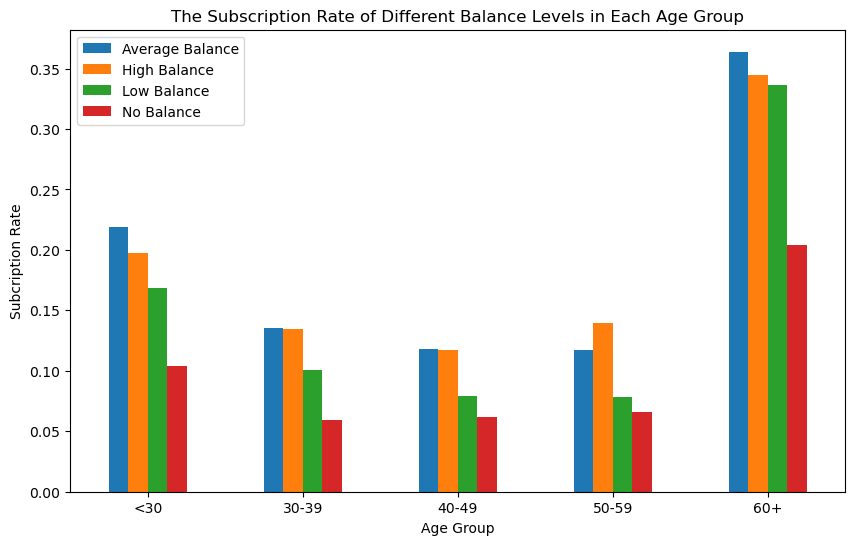

In [33]:
age_bal = age_balance1.plot(kind='bar', figsize=(10,6))

plt.xticks(np.arange(5), ('<30','30-39','40-49','50-59', '60+'), rotation='horizontal')
plt.xlabel('Age Group')
plt.ylabel('Subcription Rate')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')

plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.show()

**Wawasan: Targetkan klien yang lebih tua dengan tingkat saldo yang tinggi.**

Sementara usia mencerminkan tahap kehidupan seseorang dan saldo mencerminkan kondisi keuangan seseorang, mengevaluasi dampak kedua faktor ini bersama-sama memungkinkan kita untuk menyelidiki apakah ada tren umum di semua kelompok usia dan untuk mengidentifikasi kombinasi fitur klien yang menunjukkan kemungkinan tertinggi untuk berlangganan.

Untuk menyelidiki efek gabungan usia dan saldo terhadap keputusan klien, kami melakukan pengelompokan dalam dua lapisan, dengan membagi pelanggan berdasarkan tingkat saldo mereka di dalam setiap kelompok usia.

Hal ini menghasilkan pemahaman bahwa untuk mencapai tingkat berlangganan yang lebih tinggi, bank dapat lebih fokus pada klien yang lebih tua dengan tingkat saldo yang tinggi. Dengan demikian, bank dapat merancang strategi pemasaran yang lebih efektif dengan mempertimbangkan faktor-faktor ini.

Grafik tersebut menggambarkan cerita yang sama tentang tingkat berlangganan untuk berbagai kelompok usia: kemauan untuk berlangganan sangat tinggi bagi orang yang berusia di atas 60 tahun dan juga bagi mereka yang berusia di bawah 30 tahun juga memiliki tingkat berlangganan yang lebih tinggi dibandingkan dengan kelompok usia lainnya.
Selain itu, pengaruh tingkat saldo terhadap keputusan berlangganan berlaku untuk setiap kelompok usia individu: setiap kelompok usia memiliki tren umum bahwa persentase berlangganan meningkat seiring dengan saldo.

Secara keseluruhan, bank sebaiknya memprioritaskan telemarketing kepada klien yang berusia di atas 60 tahun dan memiliki saldo yang positif, karena mereka memiliki tingkat penerimaan tertinggi, sekitar 35%. Kelompok berikutnya yang sebaiknya difokuskan oleh bank adalah klien muda dengan saldo positif, yang menunjukkan tingkat berlangganan tinggi antara 15% hingga 20%.

## 4.4 Visualize the subcription rate by job

In [34]:
job_rate = pd.crosstab(dataset7['response'], dataset7['job']).apply(lambda x : x/x.sum() * 100)
job_rate = job_rate.transpose()
job_rate

response,no,yes
job,,
admin.,88.034006,11.965994
blue-collar,92.765474,7.234526
entrepreneur,91.865672,8.134328
housemaid,91.209748,8.790252
management,86.865149,13.134851
other,90.506329,9.493671
retired,77.821782,22.178218
self-employed,88.773389,11.226611
services,91.265456,8.734544


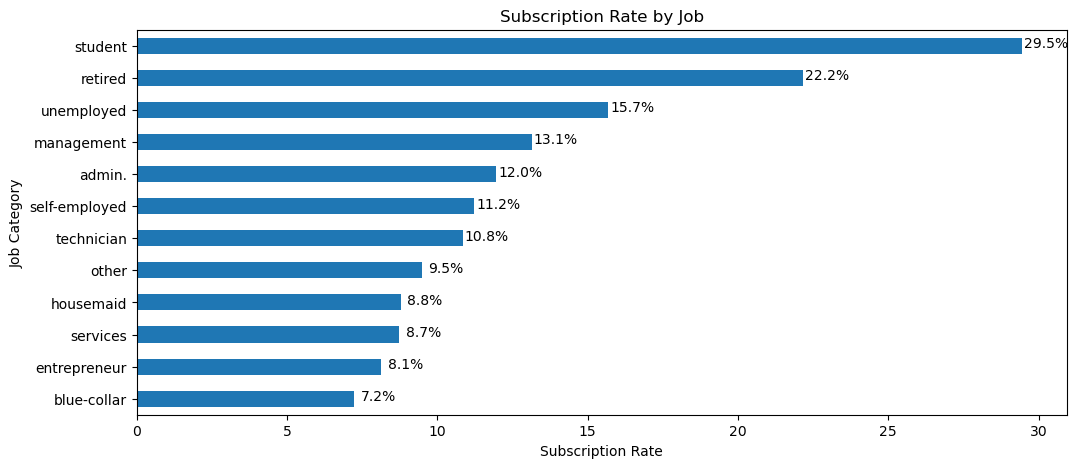

In [35]:
job_plot = job_rate['yes'].sort_values(ascending=True).plot(kind='barh', figsize=(12,5))

plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# label each bar
for rec, label in zip(job_plot.patches, job_rate['yes'].sort_values(ascending = True).round(1).astype(str)):
    job_plot.text(rec.get_width() + 0.8,
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')
    
plt.show()

## 4.5 visualize the subcription and contracr rate by 'month'

In [36]:
count_mount_response = pd.crosstab(dataset7['response'], dataset7['month_int']).apply(lambda x : x/x.sum() * 100)
count_mount_response = count_mount_response.transpose()
count_mount_response

response,no,yes
month_int,,
1,89.687236,10.312764
2,82.728078,17.271922
3,45.700246,54.299754
4,80.387505,19.612495
5,93.389885,6.610115
6,89.903153,10.096847
7,91.533742,8.466258
8,89.552493,10.447507
9,51.203501,48.796499


In [37]:
month = pd.DataFrame(dataset7['month_int'].value_counts())
month['% Contacted'] = month['month_int'] * 100 / month['month_int'].sum()
month['% Subcription'] = count_mount_response['yes']
month.drop('month_int', inplace=True, axis=1)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)


month

,% Contacted,% Subcription,Month
1,2.896599,10.312764,1
2,5.528758,17.271922,2
3,0.996548,54.299754,3
4,6.192307,19.612495,4
5,30.596704,6.610115,5
6,11.882667,10.096847,6
7,15.964350,8.466258,7
8,14.389951,10.447507,8
9,1.118974,48.796499,9
10,1.481355,44.958678,10


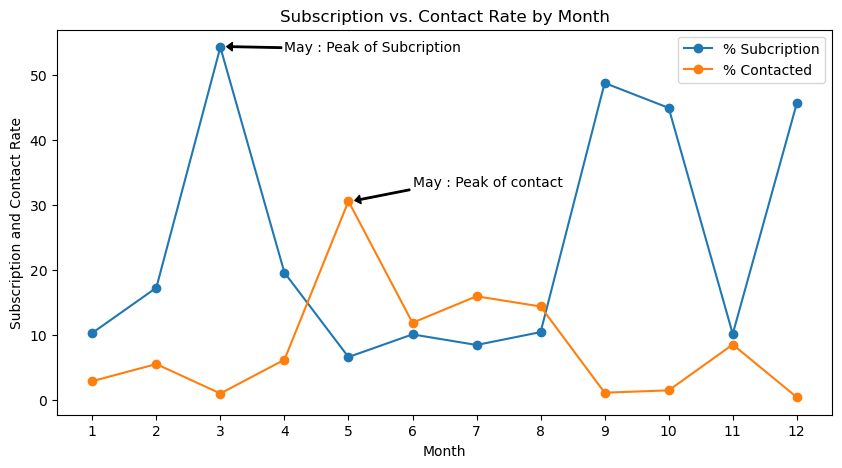

In [38]:
plot = month[['% Subcription','% Contacted']].plot(kind='line', figsize=(10,5), marker='o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')


# Annotation: peak by contacted
plt.xticks(np.arange(1,13,1))
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May : Peak of contact', xytext=(x+1,y+4), xy=(x+0.1, y+0.1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4),horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
plt.xticks(np.arange(1,13,1))
y = month['% Subcription'].max()
x = month['% Subcription'].idxmax()
plt.annotate('May : Peak of Subcription', xytext=(x+1,y+1), xy=(x+0.1,y+0.1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4),horizontalalignment='left', verticalalignment='top')


plt.show()

**Wawasan: Memulai kampanye telemarketing pada musim gugur atau musim semi**

Selain karakteristik pelanggan, faktor-faktor eksternal juga dapat berdampak pada tingkat langganan, seperti musim dan waktu panggilan. Jadi, bulan kontak juga dianalisis di sini.

Grafik garis ini menampilkan tingkat kontak bank pada setiap bulan serta tingkat respons klien pada setiap bulan. Salah satu cara untuk mengevaluasi efektivitas rencana pemasaran bank adalah melihat apakah kedua garis ini memiliki tren yang serupa dalam jangka waktu yang sama.

Bank menghubungi sebagian besar klien antara bulan Mei dan Agustus. Tingkat kontak tertinggi adalah sekitar 30%, yang terjadi pada bulan Mei, sementara tingkat kontak lebih mendekati 0 pada bulan Maret, September, Oktober, dan Desember.

Namun, tingkat langganan menunjukkan tren yang berbeda. Tingkat langganan tertinggi terjadi pada bulan **Maret, yaitu lebih dari 50%, dan semua tingkat langganan pada bulan September, Oktober, dan Desember lebih dari 40%.**

Jelas, kedua garis ini bergerak ke arah yang berbeda, yang dengan kuat menunjukkan bahwa waktu yang tidak tepat dalam kampanye pemasaran bank. Untuk meningkatkan kampanye pemasaran, bank sebaiknya mempertimbangkan untuk memulai kampanye telemarketing pada musim gugur dan musim semi ketika tingkat langganan cenderung lebih tinggi.

Namun, bank sebaiknya berhati-hati saat menganalisis faktor eksternal. Lebih banyak data dari kampanye pemasaran sebelumnya sebaiknya dikumpulkan dan dianalisis untuk memastikan bahwa efek musiman ini konsisten seiring waktu dan berlaku untuk masa depan.

# Part 5. Machine Learning : Classification

In [39]:
# drop column unnessecary
dataset7.drop(['month_int', 'age_group','balance_group'], axis=1, inplace=True)
dataset7.reset_index(drop=True, inplace=True)

In [40]:
dataset7

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


# Prepare Data for Classification

## 5.1 Select variable relevant to customers

Hanya informasi pelanggan yang paling relevan yang dipertimbangkan, termasuk jabatan pekerjaan, pendidikan, usia, saldo, catatan gagal bayar, catatan perumahan, dan catatan pinjaman. Informasi lain, seperti 'jumlah kontak yang dilakukan sebelum kampanye ini', diabaikan karena tidak secara langsung berkaitan dengan pelanggan itu sendiri.

In [41]:
dataset7.drop('marital', axis=1, inplace=True)
dataset8 = dataset7.iloc[:, 0:7]

In [42]:
dataset8

,age,job,education,default,balance,housing,loan
0,58,management,tertiary,no,2143,yes,no
1,44,technician,secondary,no,29,yes,no
2,33,entrepreneur,secondary,no,2,yes,yes
3,35,management,tertiary,no,231,yes,no
4,28,management,tertiary,no,447,yes,yes
...,...,...,...,...,...,...,...
40836,25,technician,secondary,no,505,no,yes
40837,51,technician,tertiary,no,825,no,no
40838,71,retired,primary,no,1729,no,no
40839,72,retired,secondary,no,5715,no,no


## 5.2 transform categorical data into dummy variables

Karena algoritma pembelajaran mesin hanya menerima nilai numerik, kelima variabel kategorikal (pekerjaan, pendidikan, default, perumahan, dan pinjaman) diubah menjadi variabel dummy.

Variabel dummy digunakan alih-alih bilangan bulat berkelanjutan karena variabel kategorikal ini bukan bersifat ordinal. Mereka hanya mewakili jenis yang berbeda daripada tingkatan, jadi variabel dummy sangat cocok untuk membedakan efek dari berbagai kategori yang berbeda.

In [43]:
dataset9 = pd.get_dummies(dataset8, columns=['job'])
dataset9 = pd.get_dummies(dataset9, columns=['education'])

dataset9['housing'] = dataset9['housing'].map({'yes' : 1, 'no' : 0})
dataset9['default'] = dataset9['default'].map({'yes' : 1, 'no' : 0})
dataset9['loan'] = dataset9['loan'].map({'yes' : 1, 'no' : 0})

dataset_response = pd.DataFrame(dataset7['response_binary'])
dataset9 = pd.merge(dataset9, dataset_response, left_index = True, right_index = True)

In [44]:
dataset9

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,response_binary
0,58,0,2143,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,44,0,29,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,33,0,2,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,35,0,231,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,28,0,447,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,0,505,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
40837,51,0,825,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
40838,71,0,1729,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
40839,72,0,5715,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


## 5.3 feature selection

In [45]:
array = dataset9.values

#features : first 20 column
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [47]:
# 20% of the data will be used for testing
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=7)

## Compare classification algorithms

ada 4 jenis algoritma classification(logistic reggresion,k-neighbors classifier, desicion tree classifier, Gaussian NB) akan dijalankan pada dataset dan performa yang bagus akan digunakan untuk membangun model klasifikasi. 

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [49]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [50]:
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB())]

In [51]:
results_c = []
names_c = []
seed=7
for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.885284 (0.005870)
KNN: 0.875306 (0.004002)
CART: 0.832578 (0.006604)
NB: 0.823855 (0.005429)


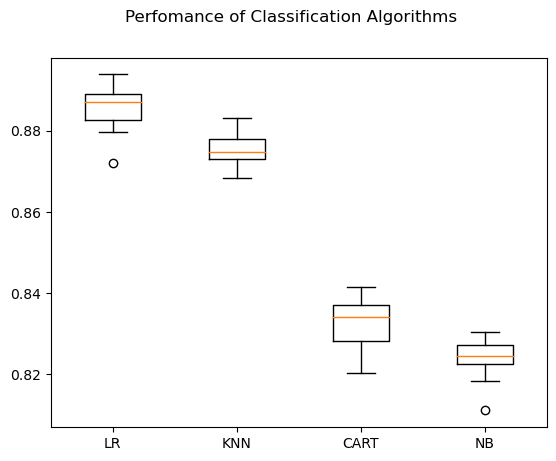

In [52]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

**Logistic Reggresion is the best performance mode**

dari semua algoritma,logistic reggresion menghasilkan akurasi sampai 88%, Mengusulkan tingkat kekuatan yang tinggi dari model ini untuk mengklasifikasikan respon pelanggan berdasarkan semua fitur pelanggan yang telah ditentukan.

# test LR model on the test set

In [53]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [54]:
predictions = LR.predict(X_test)

# Accuracy Score 
print(accuracy_score(Y_test, predictions))

0.8909291222915902


Skor akurasi adalah persentase prediksi yang benar dari semua prediksi yang dibuat. Algoritma Regresi Logistik (LR) mencapai akurasi sebesar 89,08%, yang menunjukkan tingkat kekuatan yang tinggi dari model ini dalam mengklasifikasikan respon pelanggan berdasarkan semua fitur pelanggan yang telah ditentukan.






[[7278    0]
 [ 891    0]]


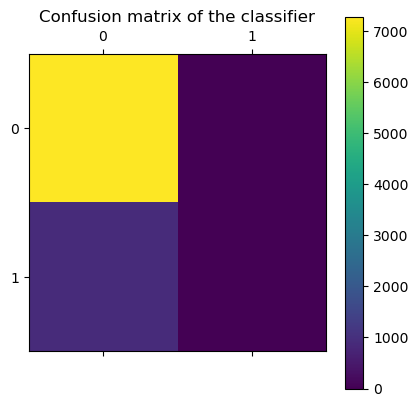

In [55]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

**Namun, hasil dari skor akurasi bisa memberikan hasil yang mungkin menyesatkan jika kumpulan data tidak seimbang, karena jumlah observasi dalam kelas yang berbeda sangat bervariasi.**

Matriks kebingungan memberikan pemecahan rinci tentang hasil prediksi dan jenis kesalahan. Setiap sel dalam matriks tersebut mewakili kombinasi dari instansi respons yang diprediksi dan respons aktual. Dalam kumpulan uji, matriks tersebut membuktikan bahwa algoritma telah berkinerja baik karena sebagian besar hasil uji (7277 prediksi True Positive) berada pada sel diagonal yang mewakili prediksi yang benar. 891 uji (False negative) memprediksi bahwa klien bank akan berlangganan deposito berjangka, tetapi sebenarnya tidak.

Masalah yang diungkapkan oleh matriks kebingungan ini adalah bahwa kumpulan data ini sangat tidak seimbang, hampir semua klien sebenarnya menolak untuk berlangganan. Ini menyiratkan bahwa skor akurasi bias, dan evaluasi lebih lanjut harus dilakukan untuk menentukan akurasi model regresi logistik.

In [56]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7278
           1       0.00      0.00      0.00       891

    accuracy                           0.89      8169
   macro avg       0.45      0.50      0.47      8169
weighted avg       0.79      0.89      0.84      8169



**Laporan klasifikasi menampilkan skor presisi, recall, F1, dan dukungan untuk model klasifikasi LR.**

- Presisi 0 (klien mengatakan tidak) mewakili bahwa dari semua instansi yang diprediksi tidak akan berlangganan, persentase klien yang sebenarnya mengatakan tidak adalah 89%.
- Recall adalah kemampuan pengklasifikasi untuk menemukan semua instansi positif. Recall 0 menunjukkan bahwa untuk semua klien yang sebenarnya mengatakan tidak, model memprediksi dengan benar 100% bahwa mereka akan menolak tawaran tersebut.

Secara umum, laporan tersebut menunjukkan bahwa model LR memiliki kekuatan prediktif yang baik untuk mengidentifikasi pelanggan yang tidak akan berlangganan deposito berjangka. Namun, karena jumlah pelanggan yang menerima deposito berjangka terbatas, ada kebutuhan untuk pengambilan sampel berstrata atau penyeimbangan untuk mengatasi kelemahan struktural ini sebelum kita menyimpulkan apakah algoritma LR dapat mengklasifikasikan dengan akurat orang-orang yang lebih mungkin berlangganan.

# Part 6 Machine Learning : Regression


## prepare data for regression

In [57]:
dataset10 = dataset9.drop('response_binary', axis=1)
dataset10['duration'] = dataset7['duration']
dataset10

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,duration
0,58,0,2143,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,4.35
1,44,0,29,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2.52
2,33,0,2,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1.27
3,35,0,231,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,2.32
4,28,0,447,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,0,505,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,6.43
40837,51,0,825,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,16.28
40838,71,0,1729,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,7.60
40839,72,0,5715,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,18.78


## 6.1 feature selection


In [65]:
array = dataset10.values
X = array[:,0:20]
Y = array[:,20]

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

# Compare regression algorithms

Six different regression algorithms (Linear Regression, Lasso, Ridge, ElasticNet, K Neighbors and Decision Tree) are run on the dataset and the best-performing one will be used to build the estimation model.

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [67]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [69]:
results_e2 = []
names_e2 = []

for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10)
    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -18.667426 (1.243464)
LASSO: -18.701201 (1.256921)
RIDGE: -18.667404 (1.243472)
EN: -18.700962 (1.256775)
KNN: -22.151776 (1.217221)
CART: -37.808188 (1.917424)


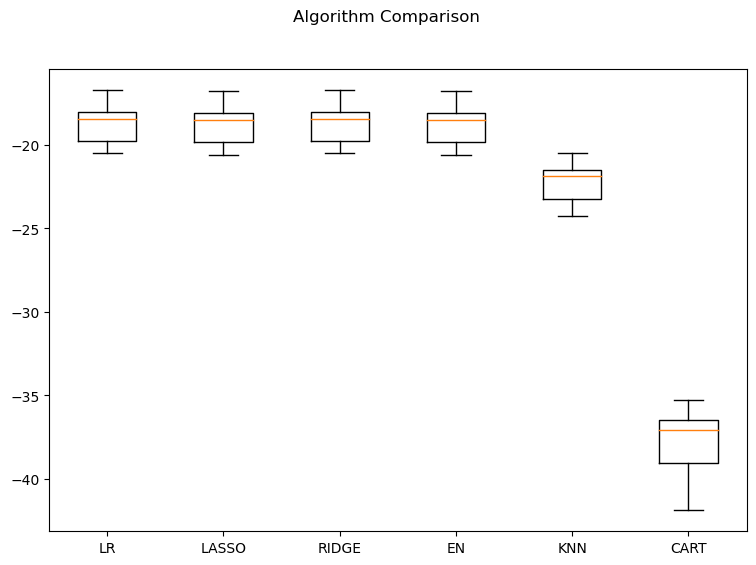

In [70]:
# Plot results
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2)
plt.show()

Regresi Ridge menujukkan performa lebih bagus dibandingkan model lain

# Standardize Data

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))

In [73]:
results_e2_normalized = []
names_e2_normalized = []

for name, model in pipelines:
    # define how to split off validation data
    kfold = KFold(n_splits=10)
    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2_normalized.append(cv_results)
    names_e2_normalized.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -18.667448 (1.244456)
ScaledLASSO: -18.721218 (1.268503)
ScaledRIDGE: -18.667425 (1.243465)
ScaledEN: -18.721218 (1.268503)
ScaledKNN: -22.097123 (1.305951)
ScaledCART: -38.055876 (1.571761)


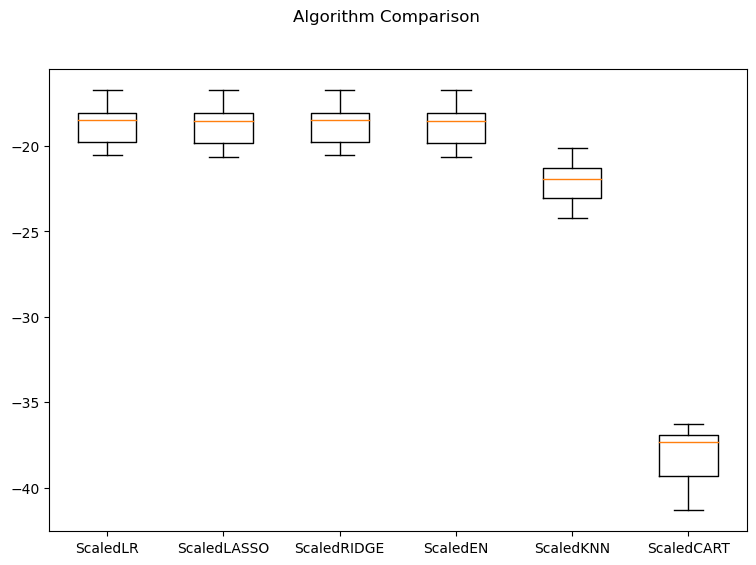

In [74]:
# Plot results
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2_normalized)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2_normalized)
plt.show()

Setelah melakukan standarisasi, Regresi Ridge masih menjadi mode permorfa terbaik

# Test RIdge model on test set

In [75]:
ridge = Ridge()
ridge.fit(X_train, Y_train)
predicted_y = ridge.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error
print('The MSE is', mean_squared_error(Y_test, predicted_y))

The MSE is 17.779740432944696


Berdasarkan analisis sebelumnya, pengamatan pada variabel durasi sangat bervariasi, mulai dari 0.1 hingga 81.97 menit dalam dataset ini. Oleh karena itu, MSE (Mean Squared Error) sebesar 17.78 mengindikasikan bahwa regresi ridge adalah model yang dapat diandalkan dalam memprediksi variabel target, dan ini menyarankan bahwa bank dapat secara kasar memperkirakan durasi panggilan kampanye untuk setiap klien berdasarkan profil pelanggan mereka, seperti usia, pekerjaan, dan pinjaman.

# Part 7 Conclusion and Recommendation

Tujuan utama dari proyek ini adalah meningkatkan efektivitas kampanye telemarketing bank, yang berhasil dicapai melalui analisis data, visualisasi, dan pembangunan model analitis. Sebuah profil pelanggan target telah dibuat sementara model klasifikasi dan regresi dibangun untuk memprediksi respons pelanggan terhadap kampanye deposito berjangka.

## Conclusion

Berdasarkan analisis sebelumnya, profil pelanggan target dapat ditetapkan. Pelanggan yang paling responsif memiliki fitur-fitur berikut:

- Fitur 1: usia < 30 atau usia > 60
- Fitur 2: pelajar atau pensiunan
- Fitur 3: saldo lebih dari 5000 euro

Dengan menerapkan algoritma regresi logistik dan ridge, model klasifikasi dan estimasi berhasil dibangun. Dengan dua model ini, bank akan dapat memprediksi respons pelanggan terhadap kampanye telemarketing sebelum menghubungi pelanggan tersebut. Dengan cara ini, bank dapat mengalokasikan lebih banyak upaya pemasaran kepada klien yang diklasifikasikan sebagai sangat mungkin menerima deposito berjangka, dan menghubungi lebih sedikit klien yang kemungkinan kecil untuk melakukan deposito berjangka.

Selain itu, memprediksi durasi sebelum menelepon dan menyesuaikan rencana pemasaran memberi manfaat baik bagi bank maupun pelanggannya. Di satu sisi, ini akan meningkatkan efisiensi kampanye telemarketing bank, menghemat waktu dan upaya. Di sisi lain, ini mencegah beberapa klien menerima iklan yang tidak diinginkan, meningkatkan kepuasan pelanggan. Dengan bantuan model regresi logistik dan ridge, bank dapat memasuki siklus berkelanjutan pemasaran yang efektif, lebih banyak investasi, dan pelanggan yang lebih bahagia.



## Recommendation

**1. Timing yang Lebih Tepat**

Ketika mengimplementasikan strategi pemasaran, faktor eksternal seperti waktu panggilan juga perlu dipertimbangkan dengan hati-hati. Analisis sebelumnya menunjukkan bahwa bulan Maret, September, Oktober, dan Desember memiliki tingkat keberhasilan tertinggi. Namun, lebih banyak data perlu dikumpulkan dan dianalisis untuk memastikan bahwa efek musiman ini konstan seiring berjalannya waktu. Jika tren ini memiliki potensi untuk berlanjut di masa depan, bank sebaiknya mempertimbangkan untuk memulai kampanye telemarketingnya pada musim gugur dan musim semi.

**2. Desain Pemasaran yang Lebih Cerdas**

Dengan menargetkan pelanggan yang tepat, bank akan mendapatkan lebih banyak respons positif, dan algoritma klasifikasi pada akhirnya akan menghilangkan ketidakseimbangan dalam dataset asli. Oleh karena itu, informasi yang lebih akurat akan tersedia bagi bank untuk meningkatkan langganan. Sementara itu, untuk meningkatkan kemungkinan berlangganan, bank sebaiknya mengevaluasi ulang konten dan desain kampanye saat ini, membuatnya lebih menarik bagi pelanggan yang dituju.

**3. Penyediaan Layanan yang Lebih Baik**

Dengan pemahaman yang lebih mendalam tentang basis pelanggannya, bank memiliki kemampuan untuk memberikan layanan perbankan yang lebih baik. Misalnya, status perkawinan dan pekerjaan mengungkap tahap hidup pelanggan, sementara status pinjaman mengindikasikan profil risikonya secara keseluruhan. Dengan informasi ini, bank dapat memperkirakan kapan pelanggan mungkin perlu melakukan investasi. Dengan cara ini, bank dapat lebih memenuhi permintaan pelanggan dengan memberikan layanan perbankan kepada pelanggan yang tepat pada waktu yang tepat.